In [1]:
!ls
# Numerical Imporst 
import pandas as pd
import numpy as np
import scipy 

# Plotting 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# Python 
import os

# sklearn 
from sklearn.metrics import f1_score # f1_score(y_true, y_pred)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectFromModel

# scipy
from scipy.cluster import hierarchy as hc # for dendograms 

Full.ipynb     README.txt     sum_tab_2.csv  train_cli.tsv
Import.ipynb   RNA-Seq.ipynb  test_cli.tsv   train_pro.tsv
NA.ipynb       start.ipynb    test_pro.tsv   train_rna.tsv
Protein.ipynb  sum_tab_1.csv  test_rna.tsv   visuals.ipynb


In [2]:
df_train_pro = pd.read_table(f'{os.getcwd()}/train_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_pro = pd.read_table(f'{os.getcwd()}/test_pro.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_rna = pd.read_table(f'{os.getcwd()}/train_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_test_rna = pd.read_table(f'{os.getcwd()}/test_rna.tsv', 
                           delim_whitespace=True,
                           low_memory=False,).T
df_train_cli = pd.read_csv(f'{os.getcwd()}/train_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_test_cli = pd.read_csv(f'{os.getcwd()}/test_cli.tsv', 
                           delim_whitespace=True,
                           low_memory=False,)
df_train_mislabel = pd.read_csv(f'{os.getcwd()}/sum_tab_1.csv', 
                           low_memory=False,)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [3]:
# df_train_pro
# df_test_pro
# df_train_rna
# df_test_rna
# df_train_cli
# df_test_cli
# df_train_mislabel

In [4]:
# Come back to the way you handle this NA, sophisticated way will imporve by at least 5% 
train_pro = df_train_pro.copy(deep=True)
train_pro = train_pro.fillna(train_pro.median())
train_pro.index.name = 'sample'

test_pro = df_test_pro.copy(deep=True)
test_pro = test_pro.fillna(test_pro.median())
test_pro.index.name = 'sample'


train_rna = df_train_rna.copy(deep=True)
train_rna = train_rna.fillna(train_rna.median())
train_rna.index.name = 'sample'

test_rna = df_test_rna.copy(deep=True)
test_rna = test_rna.fillna(test_rna.median())
test_rna.index.name = 'sample'

In [5]:
# df_train_pro
# train_pro
# df_test_pro
# test_pro

In [6]:
# df_train_rna
# train_rna
# df_test_rna
# test_rna

In [7]:
train_cli = df_train_cli.copy(deep=True)
train_cli = train_cli.set_index('sample')
train_cli = train_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

test_cli = df_test_cli.copy(deep=True)
test_cli = test_cli.set_index('sample')
test_cli = test_cli.replace({'gender': {'Male':0, 'Female':1},
                              'msi': {'MSI-Low/MSS':0, 'MSI-High':1}})

In [8]:
# df_train_cli
# train_cli
# df_test_cli
# test_cli

In [9]:
train_mislabel = df_train_mislabel.copy(deep=True)
train_mislabel = train_mislabel.set_index('sample')

In [10]:
# df_train_mislabel
# train_mislabel

In [11]:
train_pro.reset_index(drop=True, inplace=True)
train_rna.reset_index(drop=True, inplace=True)
train_cli.reset_index(drop=True, inplace=True)
train_mislabel.reset_index(drop=True, inplace=True)

In [12]:
# train_pro
# train_rna
# train_cli
# train_mislabel

In [13]:
train_pro_combined = pd.concat([train_mislabel, train_cli, train_pro], axis=1)
train_rna_combined = pd.concat([train_mislabel, train_cli, train_rna], axis=1)

In [14]:
# train_pro_combined
train_rna_combined

,mismatch,gender,msi,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,ABCA8,ABCA9,ABCB1,ABCB10,ABCB11,ABCB4,ABCB5,ABCB6,...,ZNRF3,ZNRF3-AS1,ZP1,ZP2,ZP3,ZRANB1,ZRANB2,ZRANB2-AS1,ZRANB2-AS2,ZRANB3,ZRSR2,ZSCAN12,ZSCAN12P1,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN23,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,1,0,0.810976,0.294094,2.898144,6.548415,1.004192,2.519397,5.749835,5.043260,0.297011,4.504254,2.024335,5.403343,1.831152,5.165514,7.240806,0.177815,5.403007,0.409724,6.551073,3.100041,5.277979,3.298451,5.045930,1.001300,5.689962,0.969101,2.982777,2.366695,0.245197,3.066077,1.492358,0.053929,0.031171,3.255512,0.519140,0.096053,2.246003,0.349446,1.483484,1.022936,0.511371,3.912004,3.714960,0.155912,0.653988,0.175236,3.802488,...,3.725585,0.248400,0.104449,0.650742,3.565297,3.719249,5.652032,1.075694,0.212262,1.959786,3.968523,2.411101,0.872757,3.839740,1.733478,3.105343,1.400933,2.869284,1.605901,0.261404,2.742984,3.169544,3.161399,1.878292,2.229121,3.330121,0.110207,2.660745,0.120036,3.788126,3.225379,2.678856,1.569208,1.836745,2.723573,3.248975,3.142273,0.593640,3.590350,4.438375,4.237545,5.958848,1.074603,2.055115,3.860331,0.135844,2.781508,5.737653,2.856527,4.245627
1,1,1,0,0.340575,0.286721,2.223730,7.355751,0.967359,2.042327,5.949647,5.540432,0.633366,3.143702,2.852460,5.214069,1.350142,4.827544,7.442804,0.077730,4.881468,0.157388,6.859313,3.773362,4.681637,2.354399,3.245056,2.188932,6.038234,0.801714,1.874068,2.420736,0.830577,2.926069,0.687222,0.172355,0.105417,3.612654,1.402553,0.166862,2.521407,0.832623,2.273459,1.123911,0.736438,1.451913,3.560877,0.057962,0.930209,0.608913,4.382873,...,3.795277,0.234447,0.123640,0.054271,5.350519,4.156577,5.161246,1.019171,0.459158,1.766263,3.784322,2.248906,0.761757,3.565489,4.819927,2.424253,1.327855,2.472639,2.118534,0.165786,2.954270,3.004311,3.299114,3.210332,2.640048,2.929429,0.155752,1.894907,0.140295,3.562856,3.558808,2.190559,2.782144,1.131546,2.633395,2.933581,4.243993,1.305374,3.022422,3.038304,4.289768,6.301068,2.412114,3.305907,4.495388,0.135844,2.898238,7.049020,4.122308,4.214849
2,0,0,0,1.612506,0.347598,2.206560,7.045954,2.028455,2.829612,5.230059,4.257250,0.614350,3.063500,3.015768,5.307434,2.007040,5.816310,6.877159,0.110958,5.428458,0.526734,6.060380,3.069175,4.679611,2.549950,4.862690,2.131480,5.540457,2.389167,3.140561,2.544298,0.459123,2.113906,0.217318,0.454064,0.089015,3.405832,1.049774,0.094002,2.719581,0.838956,3.027581,0.836651,0.537880,3.916830,3.583882,0.174002,0.732249,0.567775,3.133188,...,2.959565,0.550244,0.788689,0.455600,4.121552,3.507342,5.240967,1.170345,0.459158,1.326116,3.944010,1.809671,0.546855,3.902223,2.772892,2.734047,1.430025,2.782721,1.644478,0.055430,3.264369,2.922697,2.869076,2.499856,2.406724,3.435969,0.110207,2.329474,0.207168,3.697366,3.733263,2.469632,2.762982,1.666771,2.570043,3.063376,3.172401,0.716711,3.832940,3.540013,4.185377,5.563719,1.745223,2.838329,3.439241,0.288019,3.023023,7.007265,3.687514,3.706342
3,0,1,0,0.768138,0.251778,2.996356,6.451277,1.142773,1.849382,5.526629,4.904821,0.721755,3.025762,2.844898,5.477457,1.477467,6.195029,6.779318,0.081480,5.484737,0.180940,6.266849,2.820478,4.246034,3.250814,4.857285,1.586813,5.563590,1.749705,2.600390,2.150795,0.358562,2.517248,0.493132,0.173244,0.194729,3.170614,1.066757,0.103360,2.310197,0.442474,2.064240,0.579675,0.309876,3.692298,4.082260,0.128512,0.608184,0.325630,2.352980,...,3.414230,0.134319,0.119343,0.189316,5.492956,3.330975,5.757606,1.206238,0.165445,1.619368,4.496024,2.009844,0.870854,3.619264,1.837384,2.559428,1.016888,3.500200,1.448117,0.188407,3.132041,3.270057,3.079330,2.296025,2.390757,3.122365,0.032869,

In [17]:
train_combined_correct = train_rna_combined.loc[train_rna_combined['mismatch'] == 0]
X_correct = train_combined_correct.drop(['mismatch'], axis=1, inplace=False)
X_correct.reset_index(drop=True, inplace=True)

gender_correct = X_correct['gender']
msi_correct = X_correct['msi']
X_correct = X_correct.drop(['gender', 'msi'], axis=1, inplace=False)

columns = X_correct.columns

In [21]:
# X_correct
# gender_correct
# msi_correct

In [22]:
X_gender_train, X_gender_valid, y_gender_train, y_gender_valid = train_test_split(X_correct.values.astype(int),
                                                                                  gender_correct, 
                                                                                  test_size=0.3)

In [23]:
# X_train
# X_valid
# y_train
# y_valid

In [24]:
# forest = RandomForestClassifier(n_estimators=500, 
#                                 n_jobs=-1, 
#                                 oob_score=True)

# # sorted(forest.get_params().keys())

# gs = GridSearchCV(estimator=forest,
#                   param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
#                                'max_features':[None, 0.5, 'sqrt', 'log2']}],
#                   scoring='accuracy',
#                   cv=5,)

# gs = gs.fit(X_gender_train, y_gender_train)
# print(gs.best_score_)
# print(gs.best_params_)

 1) RPS4Y1                         0.589636
 2) ZFX                            0.083366
 3) DDX3Y                          0.058835
 4) UTY                            0.039419
 5) SRSF6                          0.032149
 6) GYG2P1                         0.013945
 7) ZRSR2                          0.007317
 8) EVPL                           0.004100
 9) LUC7L2                         0.003905
10) SRGAP2B                        0.003556
11) NAT8                           0.002984
12) ZNF862                         0.002690
13) ODAM                           0.002597
14) RGS4                           0.002507
15) RNASEH2A                       0.002478
16) EIF1AY                         0.002344
17) FOXD2                          0.002102
18) PMS2P3                         0.001919
19) MND1                           0.001834
20) FAM3D                          0.001813
21) DDB2                           0.001805
22) DDX3X                          0.001775
23) NINJ2                       

<BarContainer object of 17447 artists>

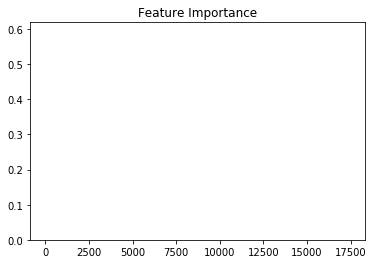

In [27]:
gender_forest = RandomForestClassifier(n_estimators=500,
                                min_samples_leaf=3,
                                max_features=None,
                                n_jobs=-1, 
                                oob_score=True)
gender_forest.fit(X_gender_train, y_gender_train)

gender_importances = gender_forest.feature_importances_
gender_indices = np.argsort(gender_importances)[::-1]

# for f in range(X_gender_train[1]): # to get the full results
for f in range(100):
    print("%2d) %-*s %f" % (f + 1, 30, columns[gender_indices[f]], gender_importances[gender_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_gender_train.shape[1]), gender_importances[gender_indices], align='center')

In [28]:
y_gender_pred = gender_forest.predict(X_gender_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))
print('OOB score: ', gender_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.67      0.80      0.73         5
          1       0.93      0.88      0.90        16

avg / total       0.87      0.86      0.86        21

OOB score:  0.9361702127659575


In [32]:
gender_select = SelectFromModel(gender_forest, threshold=0.001)

gender_select.fit(X_gender_train, y_gender_train)

X_gender_important_train = gender_select.transform(X_gender_train)
X_gender_important_train_df = pd.DataFrame(X_gender_important_train)
X_gender_important_valid = gender_select.transform(X_gender_valid)

In [33]:
gender_forest.fit(X_gender_important_train, y_gender_train)
y_pred = gender_forest.predict(X_gender_important_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_gender_valid, y_pred=y_gender_pred))
print('OOB score: ', gender_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.67      0.80      0.73         5
          1       0.93      0.88      0.90        16

avg / total       0.87      0.86      0.86        21

OOB score:  0.9361702127659575


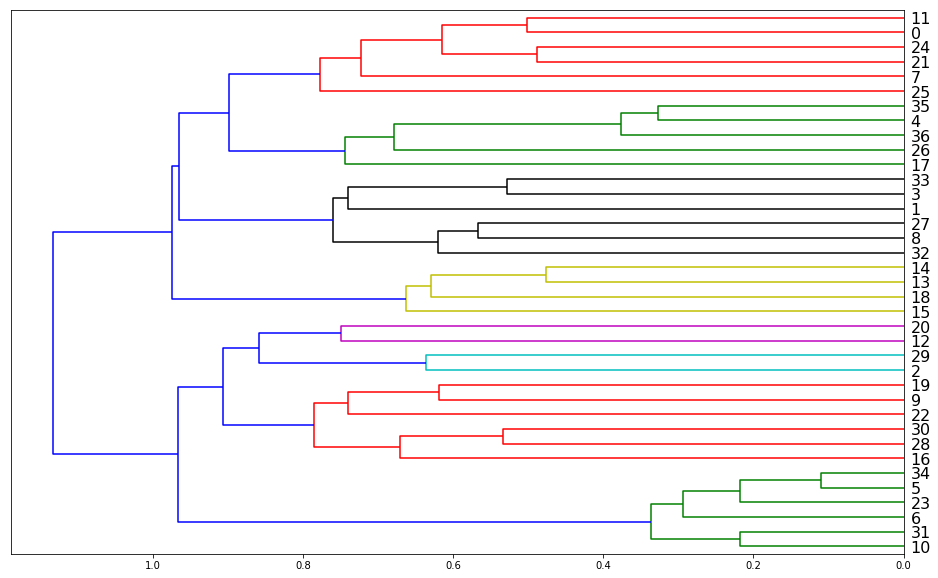

In [34]:
gender_corr = np.round(scipy.stats.spearmanr(X_gender_important_train).correlation, 4)
gender_corr_condensed = hc.distance.squareform(1-gender_corr)
z = hc.linkage(gender_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
gender_dendrogram = hc.dendrogram(z, labels=X_gender_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()

In [35]:
X_msi_train, X_msi_valid, y_msi_train, y_msi_valid = train_test_split(X_correct.values.astype(int),
                                                                      msi_correct,
                                                                      test_size=0.3)

In [36]:
# forest = RandomForestClassifier(n_estimators=500, 
#                                 n_jobs=-1, 
#                                 oob_score=True)

# # sorted(forest.get_params().keys())

# gs = GridSearchCV(estimator=forest,
#                   param_grid=[{'min_samples_leaf':[1, 3, 5, 10, 25, 100], 
#                                'max_features':[None, 0.5, 'sqrt', 'log2']}],
#                   scoring='accuracy',
#                   cv=5,)

# gs = gs.fit(X_msi_train, y_msi_train)
# print(gs.best_score_)
# print(gs.best_params_)

 1) EPDR1                          0.107184
 2) APOL3                          0.081087
 3) POU5F1B                        0.043901
 4) CFTR                           0.037919
 5) CIITA                          0.037566
 6) RAB32                          0.025853
 7) MAX                            0.021932
 8) PRSS23                         0.017940
 9) FABP6                          0.017932
10) GABRP                          0.017785
11) LAP3                           0.016000
12) LY6G6D                         0.016000
13) SLC19A3                        0.016000
14) WARS                           0.015946
15) DLGAP1-AS5                     0.015932
16) GBP1                           0.014000
17) RAMP1                          0.014000
18) AREG                           0.013940
19) GSPT2                          0.013902
20) TNFAIP2                        0.012000
21) EREG                           0.010000
22) TNNC2                          0.010000
23) ANKRD27                     

<BarContainer object of 17447 artists>

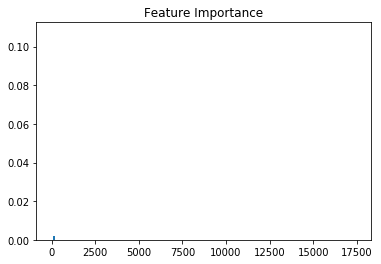

In [37]:
msi_forest = RandomForestClassifier(n_estimators=500,
                                min_samples_leaf=5,
                                max_features=None,
                                n_jobs=-1, 
                                oob_score=True)

msi_forest.fit(X_msi_train, y_msi_train)

msi_importances = msi_forest.feature_importances_
msi_indices = np.argsort(msi_importances)[::-1]

# for f in range(X_train.shape[1]): # to get the full results
for f in range(100):
    print("%2d) %-*s %f" % (f + 1, 30, columns[msi_indices[f]], msi_importances[msi_indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(X_msi_train.shape[1]), msi_importances[msi_indices], align='center')

In [38]:
y_msi_pred = msi_forest.predict(X_msi_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))
print('OOB score: ', msi_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.81      0.93      0.87        14
          1       0.80      0.57      0.67         7

avg / total       0.81      0.81      0.80        21

OOB score:  0.8723404255319149


In [52]:
msi_select = SelectFromModel(msi_forest, threshold=0.005)

msi_select.fit(X_msi_train, y_msi_train)

X_msi_important_train = msi_select.transform(X_msi_train)
X_msi_important_train_df = pd.DataFrame(X_msi_important_train)
X_msi_important_valid = msi_select.transform(X_msi_valid)

In [53]:
msi_forest.fit(X_msi_important_train, y_msi_train)
y_msi_pred = msi_forest.predict(X_msi_important_valid)
print('k=5 Nearest Neighbors: \n', classification_report(y_true=y_msi_valid, y_pred=y_msi_pred))
print('OOB score: ', msi_forest.oob_score_)

k=5 Nearest Neighbors: 
              precision    recall  f1-score   support

          0       0.81      0.93      0.87        14
          1       0.80      0.57      0.67         7

avg / total       0.81      0.81      0.80        21

OOB score:  0.9361702127659575


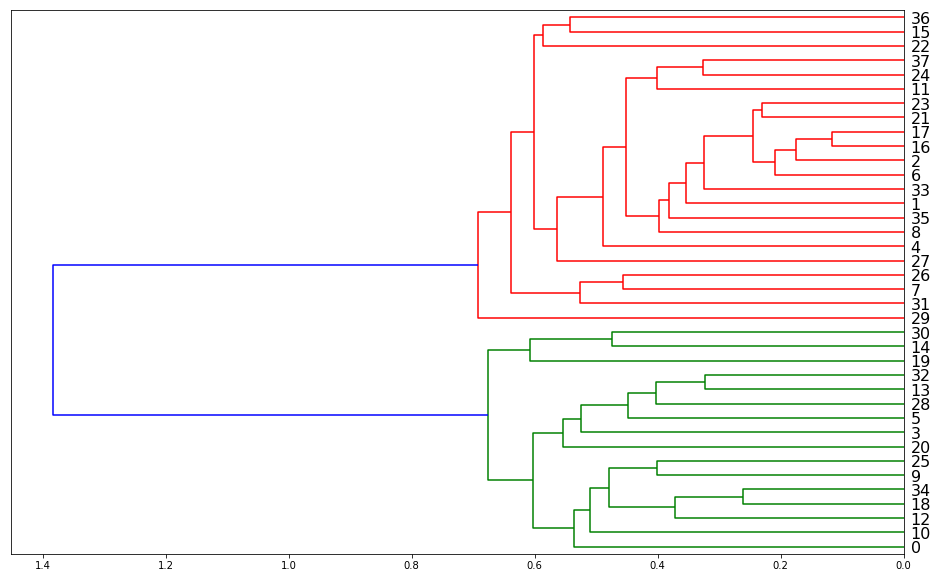

In [54]:
msi_corr = np.round(scipy.stats.spearmanr(X_msi_important_train).correlation, 4)
msi_corr_condensed = hc.distance.squareform(1-msi_corr)
msi_z = hc.linkage(msi_corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
msi_dendrogram = hc.dendrogram(msi_z, labels=X_msi_important_train_df.columns, orientation='left', leaf_font_size=16)
plt.show()